In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/
!mkdir Dog_Breed_Classification_İnal

ROOT_DIR = '/content/drive/MyDrive/Dog_Breed_Classification_İnal/'
%cd {ROOT_DIR}
!ls

Mounted at /content/drive/
/content/drive/MyDrive
mkdir: cannot create directory ‘Dog_Breed_Classification_İnal’: File exists
/content/drive/MyDrive/Dog_Breed_Classification_İnal
labels.csv  train  train.zip


## Gerekli kütüphaneleri kuruyoruz

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import tensorflow as tf
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from tqdm import tqdm

## Labels verisini bir dataframe e yüklüyoruz

In [ ]:
labels_all = pd.read_csv(ROOT_DIR + '/labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
breed_all = labels_all['breed']
breed_count = breed_all.value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

## İstediğimiz 15 ırkı seçiyoruz

In [ ]:
secilen_irklar = ['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound']
labels = labels_all[(labels_all['breed'].isin(secilen_irklar))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
1,6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
2,8,003df8b8a8b05244b1d920bb6cf451f9,basenji
3,15,00792e341f3c6eb33663e415d0715370,african_hunting_dog
4,23,0097c6242c6f3071762d9f85c3ef1b2f,bedlington_terrier


## Görselleri 128x128 çözünürlükte boyutlandırıp, normalize edip, one-hot encoding ile öğrenmeye uygun hale getiriyoruz

In [ ]:
X_data = np.zeros((len(labels), 128, 128, 3), dtype='float32')
Y_data = label_binarize(labels['breed'], classes = secilen_irklar)

for i in tqdm(range(len(labels))):
    img = image.load_img(ROOT_DIR + '/train/%s.jpg' % labels['id'][i], target_size=(128, 128))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

 14%|█▍        | 198/1407 [02:48<10:21,  1.94it/s]

## Veri setini bölüyoruz

In [ ]:
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

## Modeli oluşturuyoruz

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(secilen_irklar), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

After defining the network architecture we found out the total parameters as 162,619.

## Model eğitimi

In [39]:
epochs = 100
batch_size = 128
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val))

Epoch 1/100
8/8 [==============================] - 55s 7s/step - loss: 5.5363 - accuracy: 0.0692 - val_loss: 5.5041 - val_accuracy: 0.0827
Epoch 2/100
8/8 [==============================] - 51s 6s/step - loss: 5.4843 - accuracy: 0.0731 - val_loss: 5.4545 - val_accuracy: 0.0787
Epoch 3/100
8/8 [==============================] - 54s 7s/step - loss: 5.4333 - accuracy: 0.0751 - val_loss: 5.4043 - val_accuracy: 0.0787
Epoch 4/100
8/8 [==============================] - 53s 7s/step - loss: 5.3826 - accuracy: 0.0830 - val_loss: 5.3547 - val_accuracy: 0.0748
Epoch 5/100
8/8 [==============================] - 51s 7s/step - loss: 5.3330 - accuracy: 0.0860 - val_loss: 5.3062 - val_accuracy: 0.0669
Epoch 6/100
8/8 [==============================] - 51s 7s/step - loss: 5.2841 - accuracy: 0.0840 - val_loss: 5.2588 - val_accuracy: 0.0669
Epoch 7/100
8/8 [==============================] - 52s 7s/step - loss: 5.2359 - accuracy: 0.0958 - val_loss: 5.2124 - val_accuracy: 0.0709
Epoch 8/100
8/8 [==========

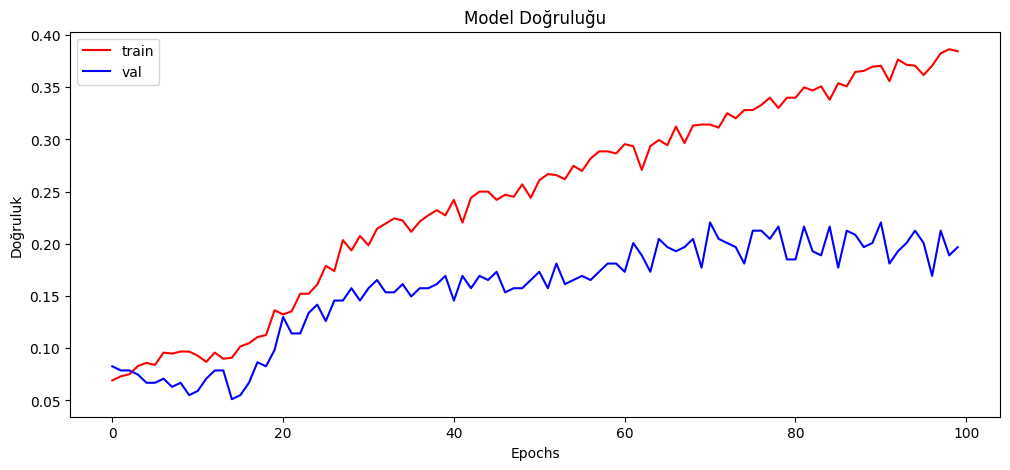

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

## Modeli kullnarak tahminde bulunuyor ve bunu beklenti ile kıyaslıyoruz

5/5 [==============================] - 3s 597ms/step


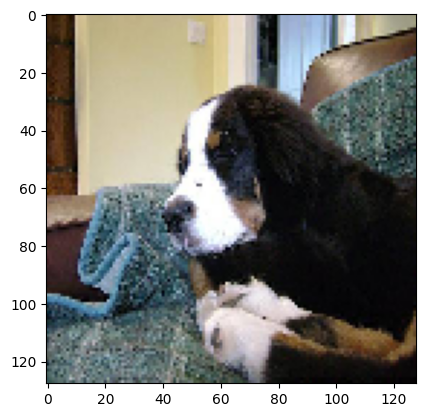

Beklenti :  australian_terrier
Tahmin :  australian_terrier


In [47]:
Y_pred = model.predict(X_test)
plt.imshow(X_test[10,:,:,:])
plt.show()
print("Beklenti : ",labels['breed'][np.argmax(Y_test[10])])
print("Tahmin : ",labels['breed'][np.argmax(Y_pred[10])])